In [6]:
import pandas as pd
import numpy as np

In [7]:
my_data = pd.read_csv("my_data_FI.csv")
my_data.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6,ClassID
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142,1
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729,1
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288,1
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023,1
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [10]:
y=my_data.iloc[:,19]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: ClassID, dtype: int64

In [11]:
x=my_data.iloc[:,0:19]
x.head()

,VV,VH,VV-VH,Entropy,Anisotropy,Alpha,GLCM PC1,GLCM PC2,GLCM PC3,GLCM PC4,GLCM PC5,GLCM PC6,DEM,PC1,PC2,PC3,PC4,PC5,PC6
0,-19.127264,-26.148289,7.021025,0.802243,0.511247,24.109398,-11.121046,2.120520,-1.187986,0.305749,-0.217070,0.766538,46,1.045,0.114,0.089072,0.028547,0.028547,0.008142
1,-17.905613,-27.497355,9.591742,0.783197,0.534009,24.449989,-11.905989,-0.035668,0.034768,0.406617,-0.557473,-0.152389,54,1.049,0.117,0.090146,0.029851,0.029851,0.008729
2,-15.280186,-22.360802,7.080616,0.771204,0.547740,23.534164,-7.164552,-7.279618,0.445399,1.520445,-0.423039,-1.244990,54,1.027,0.126,0.087076,0.028418,0.028418,0.005288
3,-14.594241,-20.822491,6.228250,0.814251,0.496232,24.446283,-5.439240,0.077479,-1.435103,-0.307729,-0.324791,-0.860380,59,1.005,0.115,0.085156,0.031047,0.031047,0.008023
4,-14.800154,-19.735399,4.935246,0.846771,0.452534,28.770714,-4.033033,0.462254,2.218574,-0.027918,-0.247315,-0.528220,53,1.020,0.122,0.082730,0.032016,0.032016,0.004915


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [14]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(x.shape);print(model)

(7547, 19)
RandomForestRegressor()


In [15]:
importance = model.feature_importances_

In [16]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01947
Feature: 1, Score: 0.02286
Feature: 2, Score: 0.01391
Feature: 3, Score: 0.03782
Feature: 4, Score: 0.04065
Feature: 5, Score: 0.01814
Feature: 6, Score: 0.10412
Feature: 7, Score: 0.01717
Feature: 8, Score: 0.02307
Feature: 9, Score: 0.02074
Feature: 10, Score: 0.05043
Feature: 11, Score: 0.01678
Feature: 12, Score: 0.22544
Feature: 13, Score: 0.06794
Feature: 14, Score: 0.11541
Feature: 15, Score: 0.05285
Feature: 16, Score: 0.05023
Feature: 17, Score: 0.04861
Feature: 18, Score: 0.05436


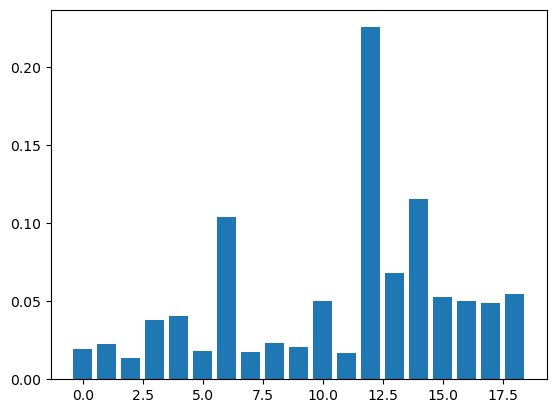

In [17]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [18]:
df=pd.DataFrame(importance,columns=['feature_weights'])
display(df)

,feature_weights
0,0.019465
1,0.022860
2,0.013909
3,0.037815
4,0.040650
5,0.018145
6,0.104121
7,0.017165
8,0.023073
9,0.020740
